Reading in Data

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Step 2: Load Data
data_path = "alzheimers_disease_data.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
# Step 3: Preprocessing
# Drop non-numeric columns if any
df_numeric = df.select_dtypes(include=[np.number]) ### check if there are any important non numeric features, if there are create dummy 1-0 features / w one-hot enconding.
df_numeric.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


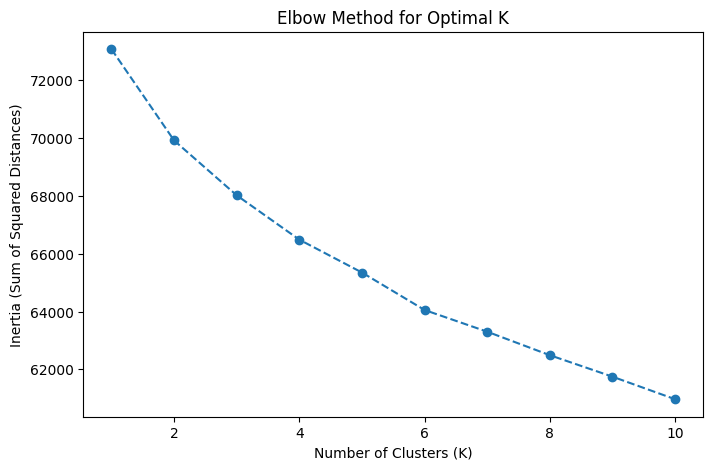

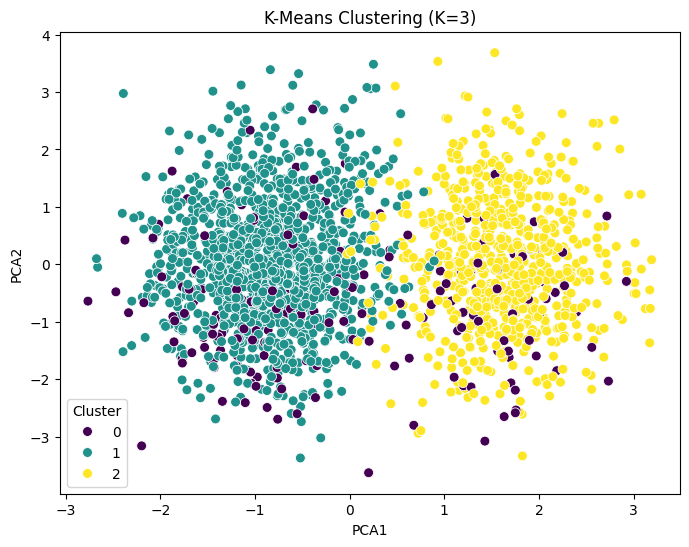

In [ ]:

# Handle missing values (Optional: fill with mean)
df_numeric = df_numeric.fillna(df_numeric.mean())

# Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 4: Finding the Optimal Number of Clusters using the Elbow Method
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Step 5: Apply K-Means Clustering with Optimal K (Assuming K=3)
optimal_k = 3  # Adjust based on the elbow curve result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)

# Step 6: Visualizing the Clusters using PCA (for 2D plot)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_numeric["PCA1"] = df_pca[:, 0]
df_numeric["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=50)
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.show()


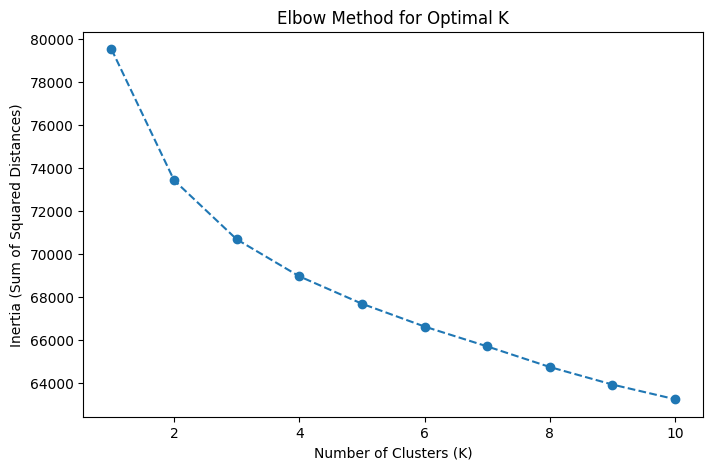

Features used for PCA:
['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis', 'PCA1', 'PCA2']


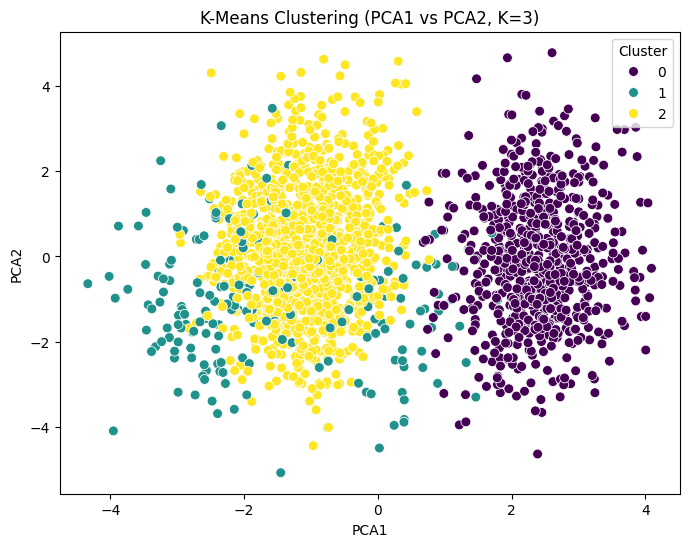

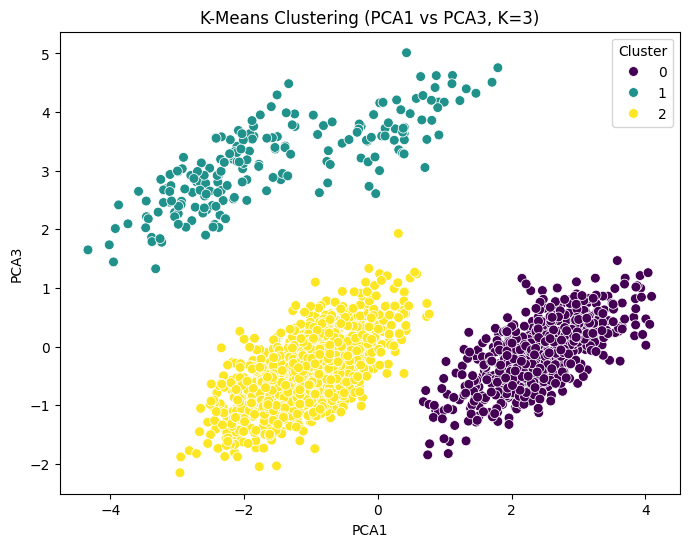

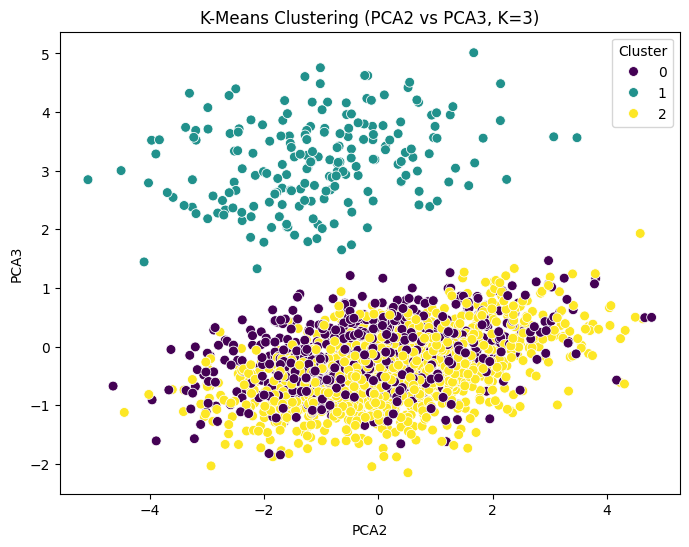

In [ ]:
# Principal Component Analysis (PCA) Description:
# PCA is a reduction technique that transforms high-dimensional data
# into a smaller number of components while preserving as much variance (information) as possible.
# It finds new axes (principal components) that are linear combinations of the original variables.
# These components are orthogonal to each other and ranked by the amount of variance they capture.

# --- Step 1: Handle Missing Values  ---
# Fill missing values in the numeric dataframe with the mean of each column
df_numeric = df_numeric.fillna(df_numeric.mean())

# --- Step 2: Standardize the Data ---
# Initialize a StandardScaler to normalize the features to have zero mean and unit variance
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(df_numeric)

# --- Step 3: Find the Optimal Number of Clusters (Elbow Method) ---
# Initialize a list to store inertia values for different K
inertia = []

# Define the range of cluster numbers to test (from 1 to 10)
K_range = range(1, 11)

# Loop through the range and fit KMeans for each K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Append the inertia (sum of squared distances)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

# --- Step 4: Apply K-Means Clustering with Optimal K ---
optimal_k = 3  # Based on the elbow curve (manually chosen)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the model and assign the cluster labels to the original data
df_numeric["Cluster"] = kmeans.fit_predict(df_scaled)

# --- Step 5: Apply PCA for Dimensionality Reduction ---

# Show the list of features used in PCA
# These are the numerical columns remaining after preprocessing
print("Features used for PCA:")
print(df_numeric.drop(columns=["Cluster"], errors='ignore').columns.tolist())

# Create a PCA object to reduce dimensions to 3 components
pca = PCA(n_components=3)

# Fit and transform the scaled data (using the same features shown above)
df_pca = pca.fit_transform(df_scaled)

# Store PCA components into new columns
df_numeric["PCA1"] = df_pca[:, 0]
df_numeric["PCA2"] = df_pca[:, 1]
df_numeric["PCA3"] = df_pca[:, 2]


# --- Step 6: Visualize PCA1 vs PCA2 ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=50)
plt.title(f"K-Means Clustering (PCA1 vs PCA2, K={optimal_k})")
plt.show()

# --- Step 7: Visualize PCA1 vs PCA3 ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x="PCA1", y="PCA3", hue="Cluster", palette="viridis", s=50)
plt.title(f"K-Means Clustering (PCA1 vs PCA3, K={optimal_k})")
plt.show()

# --- Step 8: Visualize PCA2 vs PCA3 ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_numeric, x="PCA2", y="PCA3", hue="Cluster", palette="viridis", s=50)
plt.title(f"K-Means Clustering (PCA2 vs PCA3, K={optimal_k})")
plt.show()

# --- Summary ---
# This code preprocesses numeric data by filling missing values and standardizing it.
# It uses the Elbow Method to determine the optimal number of clusters for KMeans.
# It then applies KMeans clustering with K=3 and uses PCA to reduce the data to 3 dimensions.
# Finally, it visualizes the clusters in three 2D scatter plots: PCA1 vs PCA2, PCA1 vs PCA3, and PCA2 vs PCA3.


In [ ]:
df_numeric.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Cluster,PCA1,PCA2,PCA3
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,0,1,0,0,2,-1.367696,1.050118,-0.509309
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,0,0,1,0,2,-0.932424,-0.982224,0.177507
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,1,0,1,0,0,2,-1.483681,1.392474,-0.318456
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,0,0,0,0,0,2,-1.134928,-2.983267,-0.262584
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,1,1,0,0,2,-0.221350,0.016972,0.117918


<ipython-input-14-5140b6490f05>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cluster_col, y=feature_name, palette="pastel")


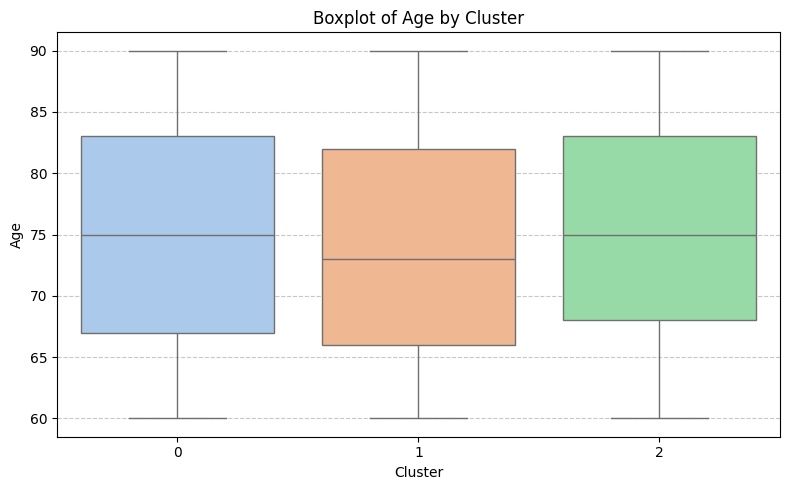

In [ ]:
cluster_col = "Cluster"
feature_name = "Age"

df = df_numeric.copy()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=cluster_col, y=feature_name, palette="pastel")
plt.title(f"Boxplot of {feature_name} by {cluster_col}")
plt.xlabel(cluster_col)
plt.ylabel(feature_name)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.groupby("Cluster").agg(["mean", "median"])


PatientID                Age           Gender        Ethnicity  \
                mean  median       mean median      mean median      mean   
Cluster                                                                     
0        5858.053237  5860.0  74.922302   75.0  0.502158    1.0  0.680576   
1        5776.256281  5730.0  73.773869   73.0  0.512563    1.0  0.668342   
2        5814.424701  5810.0  75.081275   75.0  0.507570    1.0  0.711554   

               EducationLevel         ... Forgetfulness        Diagnosis  \
        median           mean median  ...          mean median      mean   
Cluster                               ...                                  
0          0.0       1.237410    1.0  ...      0.299281    0.0  0.991367   
1          0.0       1.261307    1.0  ...      0.301508    0.0  0.321608   
2          0.0       1.317928    1.0  ...      0.302789    0.0  0.005578   

                    PCA1                PCA2                PCA3            
        median      mean    median      mean    median      mean    median  
Cluster                                                                     
0          1.0  2.397237  2.397057 -0.086861 -0.135944 -0.136514 -0.124153  
1          0.0 -1.550544 -2.009086 -1.048219 -1.115192  3.151764  3.156777  
2          0.0 -1.081690 -1.082977  0.214314  0.136604 -0.424162 -0.436119  

[3 rows x 74 columns]

In [ ]:
pd.set_option('display.max_columns', None)

df.groupby("Diagnosis").agg(["mean"])


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Cluster,PCA1,PCA2,PCA3
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5806.177106,74.945284,0.514039,0.708423,1.316055,27.515092,0.290137,10.071880,4.90764,4.974839,7.124832,0.262779,0.136069,0.159107,0.202304,0.097192,0.139669,134.564435,89.778978,224.996342,125.361434,58.734832,226.571537,16.265543,5.860669,0.115911,0.096472,5.707951,0.210943,0.164867,0.156228,0.156228,0.301656,1.894168,-1.204250,0.109809,-0.102336
1,5859.401316,74.842105,0.492105,0.677632,1.232895,27.912670,0.285526,9.980156,4.94316,5.026581,6.916292,0.232895,0.159211,0.135526,0.197368,0.084211,0.165789,133.717105,89.973684,225.565197,122.461726,60.795330,231.406671,11.994657,3.653380,0.376316,0.267105,3.657938,0.194737,0.146053,0.140789,0.163158,0.301316,0.102632,2.200926,-0.200690,0.187032
